In [1]:
import numpy as np
import os

In [175]:
cases = ['16384']
algos = ['sac','ddpg','TD3']
seeds = ['42','0','1','2','3']
data = {}
for algo in algos:
    data[algo]={}
    for case in cases:
        data[algo][case]={}
        for seed in seeds:
            data[algo][case][seed]={}
            for beam in range(4):
                b_str = f'beam_{beam}'
                if seed == '42':
                    file = f'beam_{beam}_gain_records_{case}_{algo}.npy'
                else:
                    file = f'beam_{beam}_gain_records_{case}_{algo}_{seed}.npy'
                data[algo][case][seed][b_str] = np.load(file)

In [42]:
data

{'sac': {'16384': {'42': {'beam_0': array([6.65440989, 0.10915405, 0.10915405, ..., 5.28798246, 5.28798246,
           5.28798246]),
    'beam_1': array([4.02485418, 0.03207299, 0.04573221, ..., 3.61043525, 3.61043525,
           3.61043525]),
    'beam_2': array([13.21862125,  0.30823758,  0.30823758, ...,  9.03916073,
            9.03916073,  9.03916073]),
    'beam_3': array([10.49740314,  0.11832687,  0.26131001, ...,  7.68019724,
            7.68019724,  7.68019724])},
   '0': {'beam_0': array([4.2826395 , 0.05786811, 0.12292077, ..., 3.81665635, 3.81665635,
           3.81665635]),
    'beam_1': array([12.38911343,  0.22807272,  0.25723013, ...,  6.58632708,
            6.58632708,  6.58632708]),
    'beam_2': array([5.27922344, 0.04839304, 0.16423744, ..., 4.83803797, 4.83803797,
           4.83803797]),
    'beam_3': array([8.59073544, 0.28740081, 0.28740081, ..., 6.70819807, 6.70819807,
           6.70819807])},
   '1': {'beam_0': array([6.65255737, 0.10472234, 0.10472234, ...

In [134]:
sac_beams = []
ddpg_beams = []
td3_beams = []
beams = {}
for algo in algos:
    beams_array = []
    beams[algo]={}
    for case in cases:    
        for beam in range(4):
            beam_array = []
            for seed in seeds:
                id_ = f'beam_{beam}'
                item = data[algo][case][seed][id_]
                beam_array.append(item[1:])

            beams[algo][id_] = {
                'mean':np.mean(beam_array,axis=0),
                'std':np.std(beam_array,axis=0)}

egc_stats= []
for beam in range(4):
    egc_array = []
    for seed in seeds:
        id_ = f'beam_{beam}'
        egc = data['sac'][case][seed][id_][0]
        egc_array.append(egc)
    mean = np.mean(egc_array)
    std = np.std(egc_array)
    egc_stats.append((mean,std))


In [215]:
data['ddpg'][case]['42']

{'beam_0': array([6.65440989, 0.21253872, 0.21253872, ..., 5.19516134, 5.19516134,
        5.19516134]),
 'beam_1': array([4.02485418, 0.02724302, 0.02724302, ..., 3.46788979, 3.46788979,
        3.46788979]),
 'beam_2': array([13.21862125,  0.43514037,  0.43514037, ...,  8.94793129,
         8.94793129,  8.94793129]),
 'beam_3': array([10.49740314,  0.25637388,  0.29847208, ...,  7.45469904,
         7.45469904,  7.45469904])}

In [214]:
data['sac'][case]['42']

{'beam_0': array([6.65440989, 0.10915405, 0.10915405, ..., 5.28798246, 5.28798246,
        5.28798246]),
 'beam_1': array([4.02485418, 0.03207299, 0.04573221, ..., 3.61043525, 3.61043525,
        3.61043525]),
 'beam_2': array([13.21862125,  0.30823758,  0.30823758, ...,  9.03916073,
         9.03916073,  9.03916073]),
 'beam_3': array([10.49740314,  0.11832687,  0.26131001, ...,  7.68019724,
         7.68019724,  7.68019724])}

In [213]:
data['TD3'][case]['42']

{'beam_0': array([6.65440989, 0.1315051 , 0.1805204 , ..., 5.19292021, 5.19292021,
        5.19292021]),
 'beam_1': array([4.02485418, 0.03158389, 0.26622346, ..., 3.61352563, 3.61352563,
        3.61352563]),
 'beam_2': array([13.21862125,  0.43129152,  0.63433129, ...,  9.00208473,
         9.00208473,  9.00208473]),
 'beam_3': array([10.49740314,  0.18975553,  0.65667486, ...,  7.6961894 ,
         7.6961894 ,  7.6961894 ])}

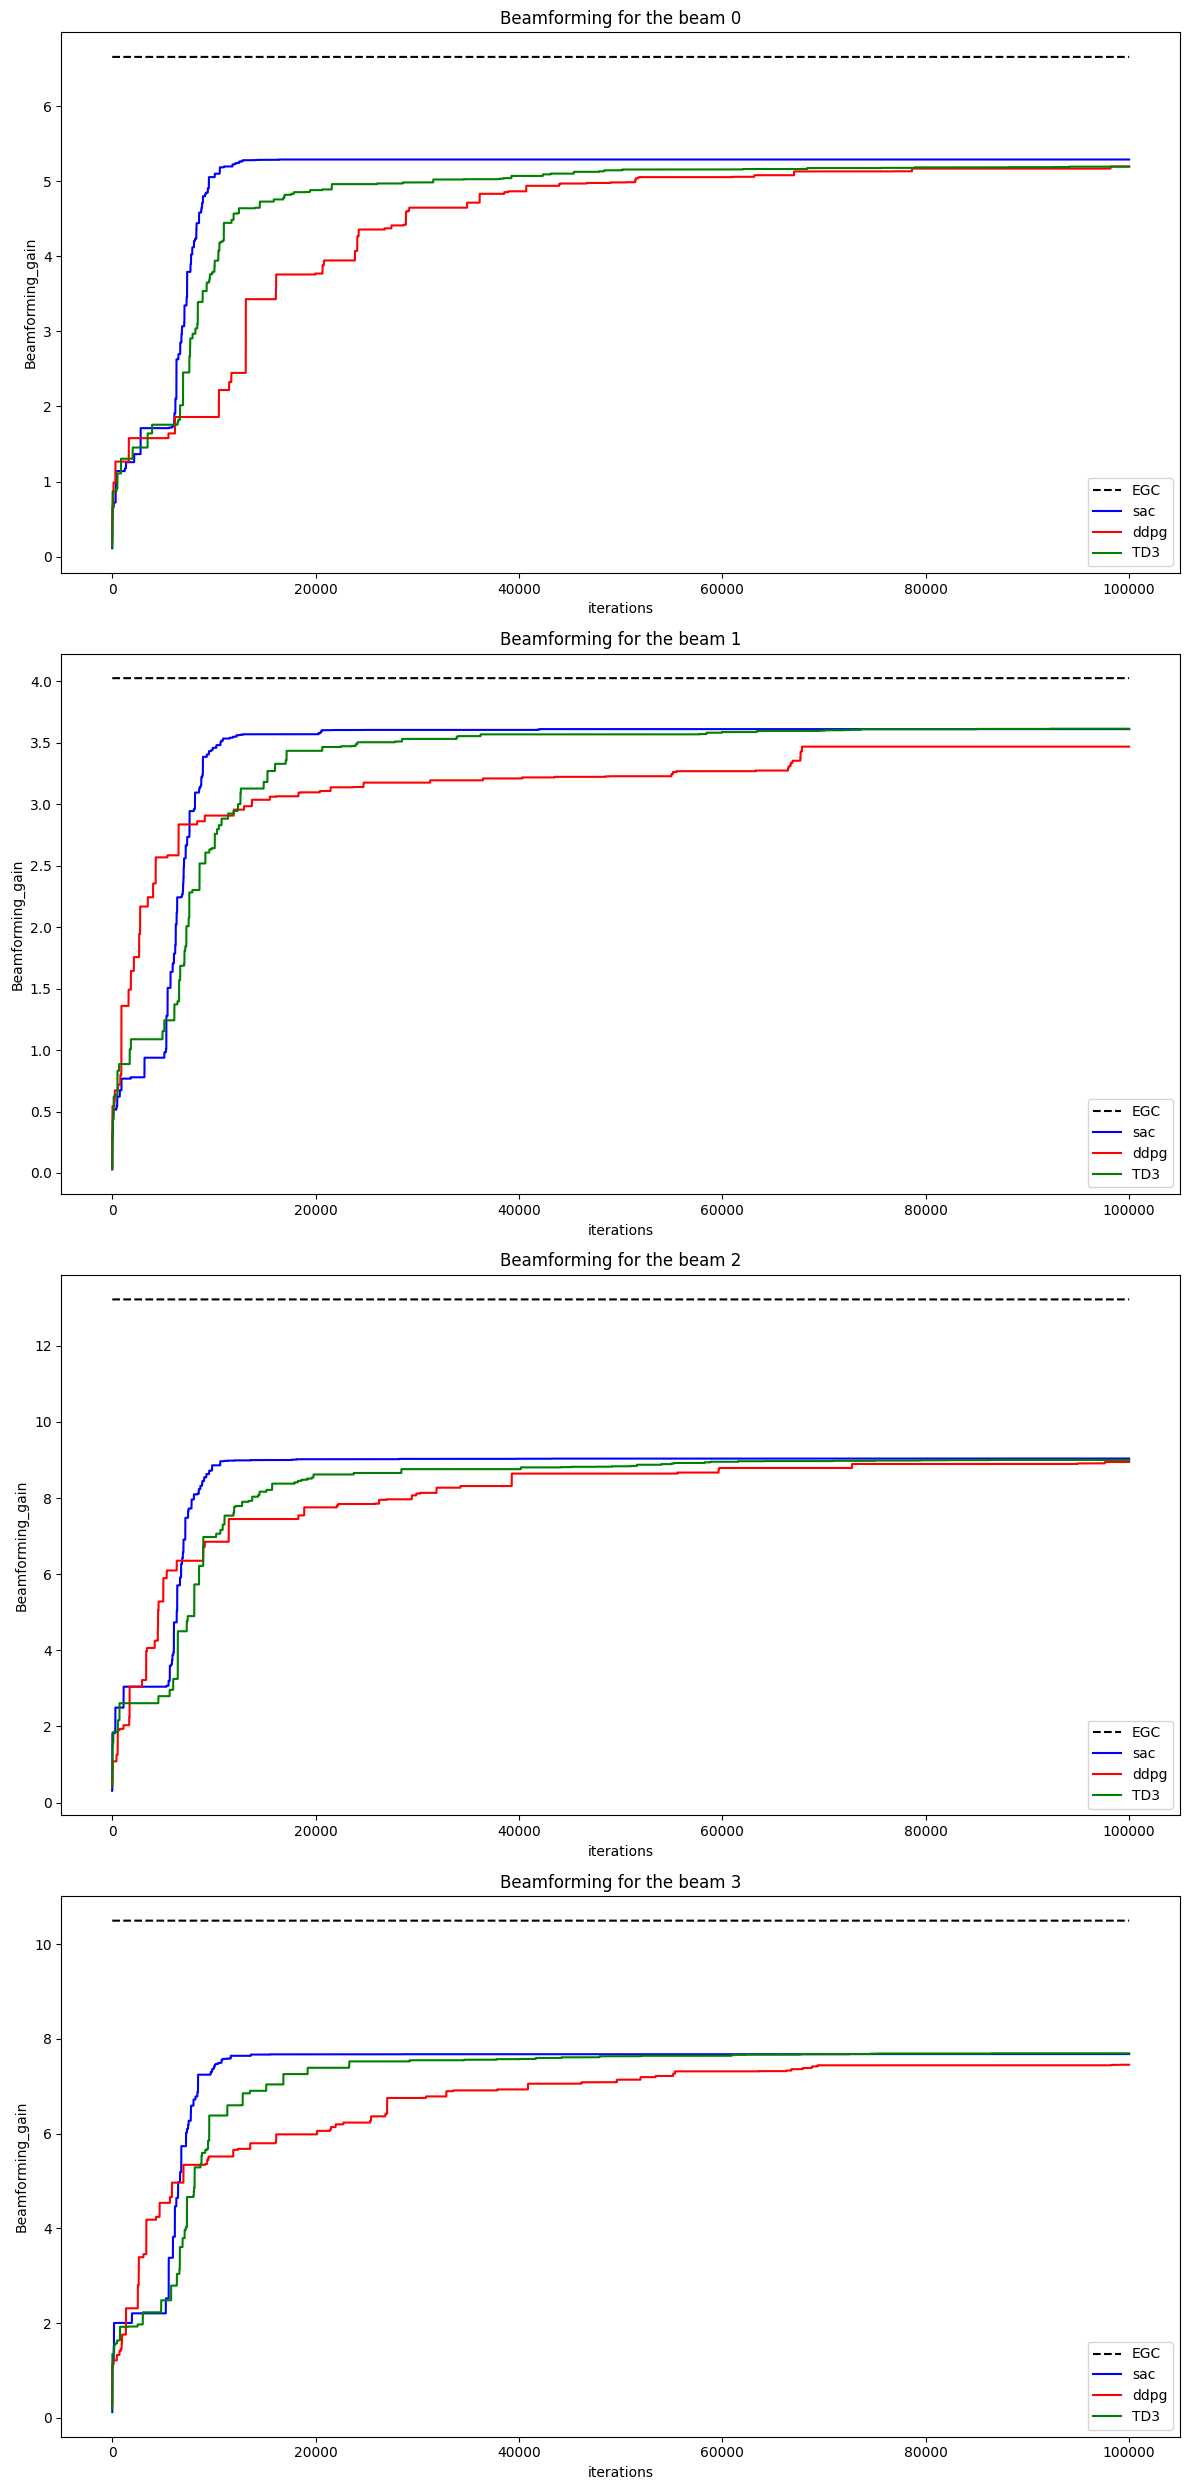

In [216]:
import matplotlib.pyplot as plt
colors = ['b','r','g']
line_styles = ['-','--',':']
case = '16384'
seed = '42'
n_iterations = data['sac'][case][seed]['beam_0'].shape[0]
algos = ['sac','ddpg','TD3']

fig, axs = plt.subplots(4, 1, figsize=(12, 25))
for beam in range(4):
    beam_id = f'beam_{beam}'
    egc = data['sac'][case][seed][beam_id][0]
    axs[beam].plot([egc]*n_iterations, label=f'EGC',color='black',linestyle='dashed')       
    for algo_idx,algo in enumerate(algos):
        beam_results = data[algo][case][seed][beam_id][1:]      
        axs[beam].plot(beam_results , label=f'{algo}',color=colors[algo_idx])     
        
        axs[beam].set_title(f"Beamforming for the beam {beam}")
        axs[beam].set_xlabel("iterations")
        axs[beam].set_ylabel("Beamforming_gain")
        axs[beam].legend()
        
plt.tight_layout()
plt.show()

In [217]:
beams={}
for algo in algos:
    beams_array = []
    beams[algo]={}
    for case in cases:    
        for beam in range(4):
            beam_array = []
            for seed in ['42','1','2']:
                id_ = f'beam_{beam}'
                item = data[algo][case][seed][id_]
                beam_array.append(abs(item[1:]-item[0]))

            beams[algo][id_] = {
                'mean':np.mean(beam_array,axis=0),
                'std':np.std(beam_array,axis=0)}           

In [149]:
beams['sac']['beam_0']['mean']

array([5.86600824, 5.81392393, 5.76309421, ..., 0.94208112, 0.94208112,
       0.94208112])

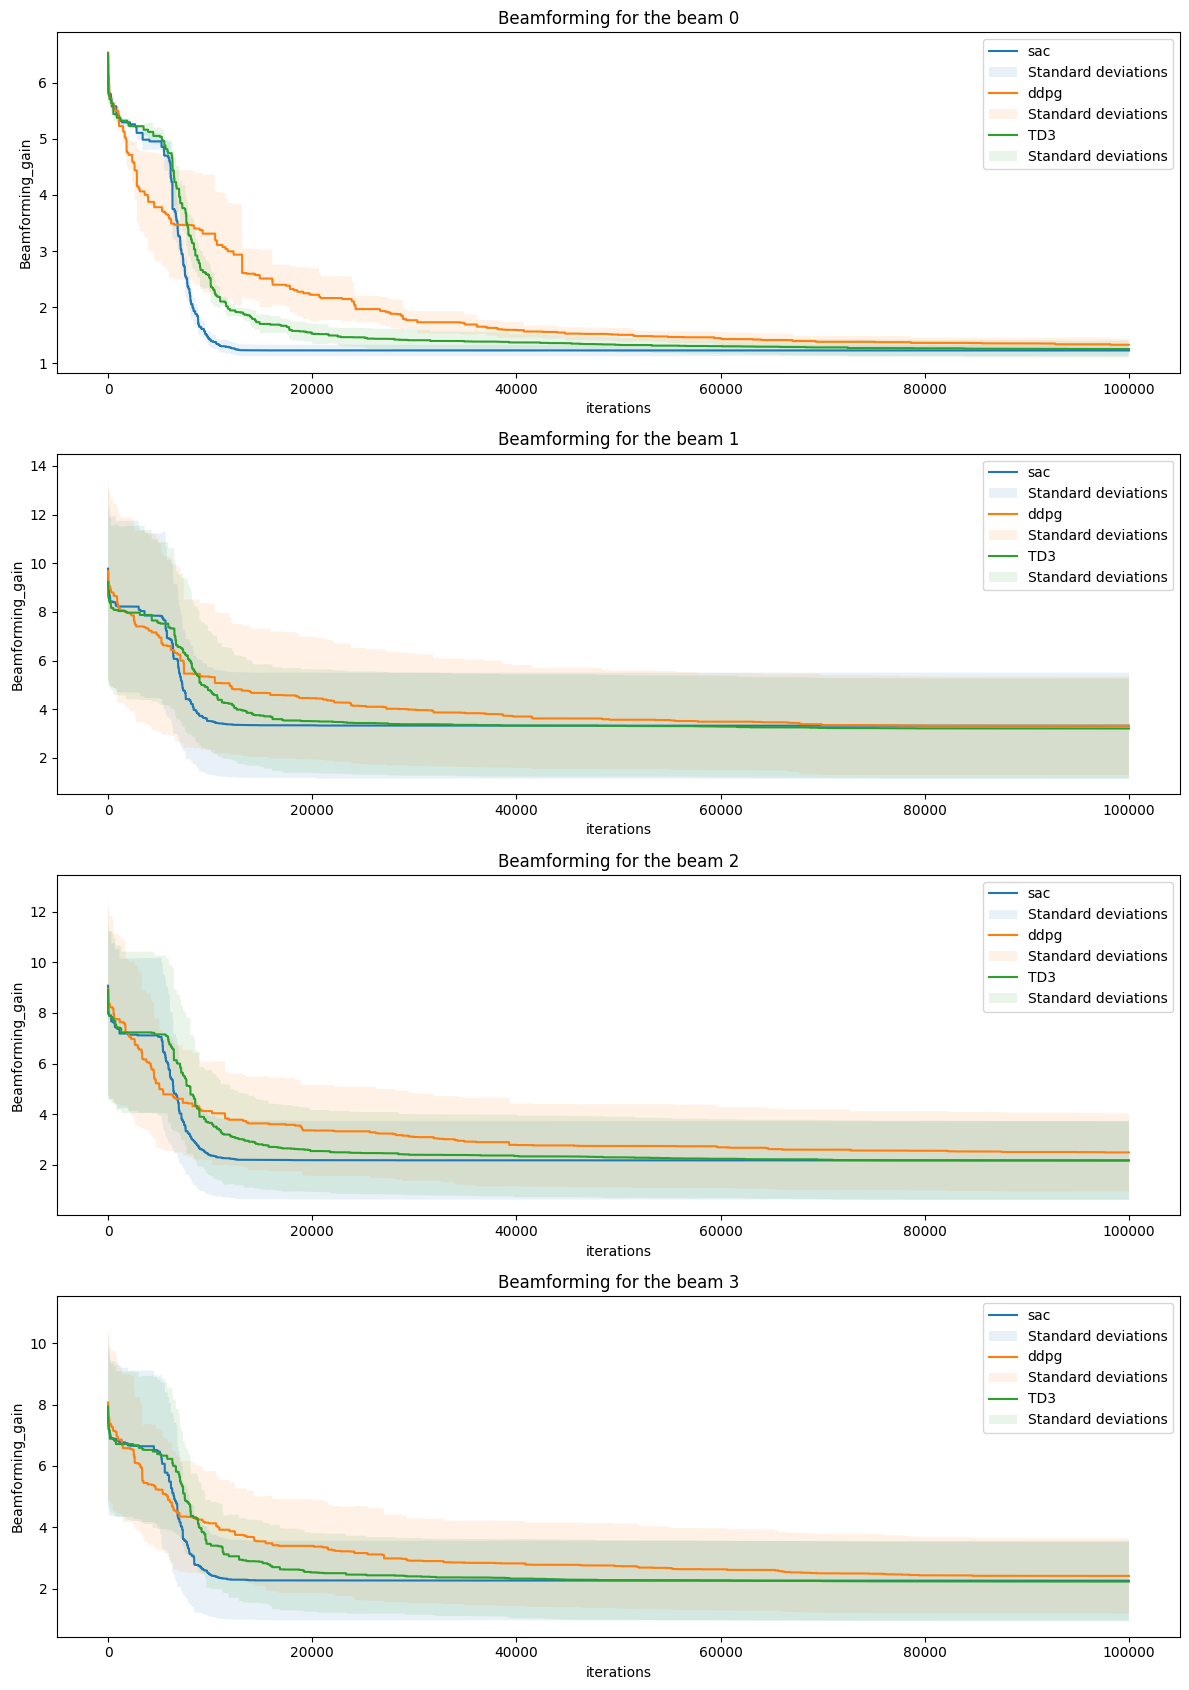

In [218]:
fig, axs = plt.subplots(4, 1, figsize=(12, 17))

for beam in range(4):
    for algo_idx,algo in enumerate(algos):
        beam_id = f'beam_{beam}'
        mean = beams[algo][beam_id]['mean']
        std = beams[algo][beam_id]['std']
        axs[beam].plot(mean, label=f'{algo}')
        axs[beam].fill_between(list(range(n_iterations-1)), mean - std, mean + std, alpha=0.1,label='Standard deviations')      
        axs[beam].set_title(f"Beamforming for the beam {beam}")
        axs[beam].set_xlabel("iterations")
        axs[beam].set_ylabel("Beamforming_gain")
        axs[beam].legend()
      
plt.tight_layout()
plt.show()